<a href="https://colab.research.google.com/github/jairomartinezgiraldo/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalar la api de kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=15488f0fa3d5e090747062bb3c54311bb0f566855b1f8efc267fe8475fbd66c9
  Stored in directory: /root/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [ ]:
# seleccionar api token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jairommartinezg","key":"1c02854f93cb8d27ae2b578639336988"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [1]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [3]:
!mkdir my_dataset

In [2]:
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

Dataset URL: https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset
License(s): CC0-1.0
 98% 437M/447M [00:04<00:00, 130MB/s]
100% 447M/447M [00:04<00:00, 99.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/yoga-posture-dataset.zip', 'r')
zip_ref.extractall('/content/my_dataset')
zip_ref.close()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

In [8]:
import os
print(os.listdir('/content/my_dataset'))


['Adho Mukha Svanasana', 'Vrksasana', 'Salamba Sarvangasana', 'Urdhva Dhanurasana', 'Sivasana', 'Ardha Navasana', 'Trikonasana', 'Alanasana', 'Bakasana', 'Paschimottanasana', 'Eka Pada Rajakapotasana', 'Ardha Chandrasana', 'Ashta Chandrasana', 'Phalakasana', 'Balasana', 'Halasana', 'Bitilasana', 'Padmasana', 'Hanumanasana', 'Malasana', 'Utthita Hasta Padangusthasana', 'Anjaneyasana', 'Dhanurasana', 'Upavistha Konasana', 'Virabhadrasana Two', 'Parsvottanasana', 'Setu Bandha Sarvangasana', 'Poses.json', 'Virabhadrasana Three', 'Vasisthasana', 'Ustrasana', 'Camatkarasana', 'Urdhva Mukha Svsnssana', 'Ardha Pincha Mayurasana', 'Marjaryasana', 'Utkatasana', 'Navasana', 'Adho Mukha Vrksasana', 'Virabhadrasana One', 'Baddha Konasana', 'Parsva Virabhadrasana', 'Utthita Parsvakonasana', 'Ardha Matsyendrasana', 'Supta Kapotasana', 'Uttanasana', 'Pincha Mayurasana', 'Salamba Bhujangasana', 'Garudasana']


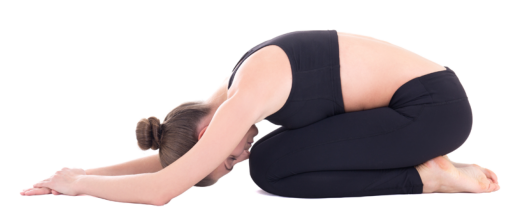

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


# Definir la ruta base del dataset
base_dir = '/content/my_dataset'

# Obtener la lista de subcarpetas
subfolders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Seleccionar una subcarpeta aleatoria
chosen_folder = np.random.choice(subfolders)
test_dir = os.path.join(base_dir, chosen_folder)  # Ruta completa de la subcarpeta seleccionada

# Escoger un índice aleatorio entre las imágenes disponibles
idx = np.random.randint(1, 10)
img_path = os.path.join(test_dir, f"File{idx}.png")  # Crear la ruta de la imagen

# Cargar la imagen y convertirla a RGB
img = cv2.imread(img_path)
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Ocultar ejes
    plt.show()
else:
    print(f'Error: No se encontró la imagen en {img_path}')

Importamos las librerias

In [10]:
number_label = {}
total_file = 0
for i in os.listdir(base_dir):
  patch = os.path.join(base_dir, i)
  if os.path.isdir(patch):
    number_label[i] = len(os.listdir(patch))
    total_file += len(os.listdir(patch))

print(number_label)
print(f"Total de imagenes: {total_file}")

{'Adho Mukha Svanasana': 74, 'Vrksasana': 68, 'Salamba Sarvangasana': 73, 'Urdhva Dhanurasana': 74, 'Sivasana': 20, 'Ardha Navasana': 13, 'Trikonasana': 23, 'Alanasana': 18, 'Bakasana': 84, 'Paschimottanasana': 62, 'Eka Pada Rajakapotasana': 53, 'Ardha Chandrasana': 59, 'Ashta Chandrasana': 12, 'Phalakasana': 66, 'Balasana': 79, 'Halasana': 71, 'Bitilasana': 94, 'Padmasana': 77, 'Hanumanasana': 41, 'Malasana': 73, 'Utthita Hasta Padangusthasana': 64, 'Anjaneyasana': 71, 'Dhanurasana': 54, 'Upavistha Konasana': 17, 'Virabhadrasana Two': 61, 'Parsvottanasana': 43, 'Setu Bandha Sarvangasana': 66, 'Virabhadrasana Three': 69, 'Vasisthasana': 80, 'Ustrasana': 96, 'Camatkarasana': 62, 'Urdhva Mukha Svsnssana': 69, 'Ardha Pincha Mayurasana': 54, 'Marjaryasana': 56, 'Utkatasana': 81, 'Navasana': 18, 'Adho Mukha Vrksasana': 65, 'Virabhadrasana One': 64, 'Baddha Konasana': 81, 'Parsva Virabhadrasana': 14, 'Utthita Parsvakonasana': 69, 'Ardha Matsyendrasana': 96, 'Supta Kapotasana': 13, 'Uttanasan

In [11]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2, imagenet_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Preparamos los datos

In [17]:
IMG_SIZE = (224, 224)  # Tamaño esperado por MobileNetV2

# Listar todas las clases (subcarpetas)
class_names = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Crear listas para imágenes y etiquetas
X, y = [], []

# Cargar las imágenes y sus etiquetas
for class_idx, class_name in enumerate(class_names):
    class_path = os.path.join(base_dir, class_name)
    images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpeg', '.jpg','.gif'))]
    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=IMG_SIZE)  # Redimensionar
        img_array = img_to_array(img)  # Convertir a array
        X.append(img_array)
        y.append(class_idx)  # Etiqueta de clase

# Convertir a arrays de NumPy
X = np.array(X)
y = np.array(y)

# Normalizar las imágenes usando imagenet_utils
X = imagenet_utils.preprocess_input(X)

# Aplicar One-Hot Encoding a las etiquetas
y = to_categorical(y, num_classes=len(class_names))

print(f'Tamaño del conjunto de datos: {X.shape}, {y.shape}')

Tamaño del conjunto de datos: (2758, 224, 224, 3), (2758, 47)


In [16]:
# Crear una lista para almacenar las extensiones de archivos de imagen
from collections import Counter
image_extensions = []

# Recorrer todas las subcarpetas y archivos en el directorio base
for root, _, files in os.walk(base_dir):
    for file in files:
        # Obtener la extensión del archivo
        ext = os.path.splitext(file)[1].lower()  # Convertir a minúsculas para evitar duplicados
        # Agregar la extensión si es un archivo de imagen
        if ext in ['.png', '.jpeg', '.jpg', '.bmp', '.gif', '.tiff', '.webp']:
            image_extensions.append(ext)

# Contar la cantidad de cada formato de imagen
extension_count = Counter(image_extensions)

print("Cantidad de formatos de imagen encontrados:")
for ext, count in extension_count.items():
    print(f"{ext}: {count}")

Cantidad de formatos de imagen encontrados:
.png: 2314
.jpeg: 401
.jpg: 41
.gif: 2


**Dividimos el Dataset en Entrenamiento y Validación**

In [19]:
# Dividir en entrenamiento y validación (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño de X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Tamaño de X_val: {X_val.shape}, y_val: {y_val.shape}')

Tamaño de X_train: (2206, 224, 224, 3), y_train: (2206, 47)
Tamaño de X_val: (552, 224, 224, 3), y_val: (552, 47)


**Modelo Preentrenado - MobileNetV2**

In [20]:
# Cargar MobileNetV2 sin las capas superiores (include_top=False)
base_model = MobileNetV2(weights='imagenet',
                         include_top=False, #
                         input_shape=(224, 224, 3))
base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

#  Evitar que los pesos se modifiquen en la parte convolucional
base_model.trainable = False

# Definir el modelo usando Sequential
pre_trained_model = Sequential()
pre_trained_model.add(base_model)  # Agregar MobileNetV2 como base
pre_trained_model.add(layers.Flatten())  # Aplanar las salidas
pre_trained_model.add(layers.Dense(256, activation='relu', name="densa_1"))  # Capa oculta
pre_trained_model.add(layers.Dense(len(class_names), activation='softmax'))  # Capa de salida

# Compilar el modelo
pre_trained_model.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Mostrar el resumen del modelo
pre_trained_model


<Sequential name=sequential_2, built=False>